<a href="https://colab.research.google.com/github/ashborn8/Ejercicio-RA2/blob/main/Perceptron_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8473 - loss: 0.6173  
Precisión en el conjunto de puntos: 0.8500


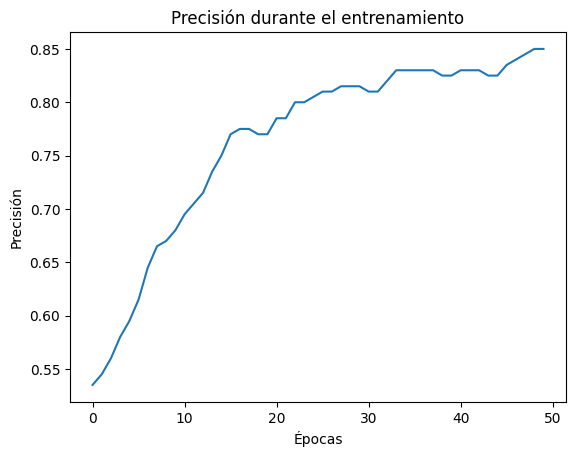

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


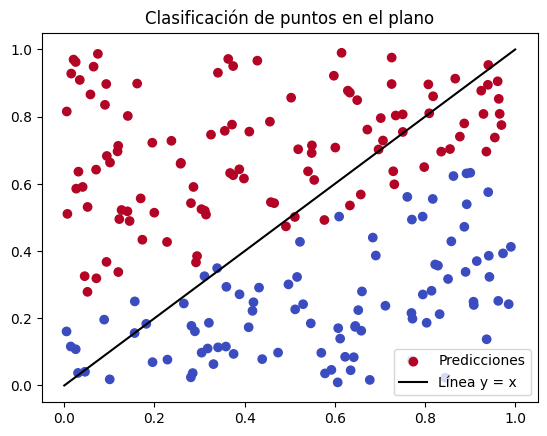

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generar puntos aleatorios
np.random.seed(42)
X = np.random.rand(200, 2)  # 200 puntos aleatorios en un plano (x, y)

# Definir las etiquetas: 1 si y > x, 0 si y <= x
y = (X[:, 1] > X[:, 0]).astype(int)

# Crear el modelo de perceptrón simple
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))  # Una capa con 1 neurona y activación sigmoide

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X, y, epochs=50, verbose=0)

# Evaluar el modelo
loss, accuracy = model.evaluate(X, y)
print(f'Precisión en el conjunto de puntos: {accuracy:.4f}')

# Visualizar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.show()

# Visualizar los puntos clasificados
predictions = model.predict(X).round().astype(int).flatten()

plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', marker='o', label='Predicciones')
plt.plot([0, 1], [0, 1], color='black', label='Línea y = x')  # Línea que separa las clases
plt.title('Clasificación de puntos en el plano')
plt.legend()
plt.show()